In [1]:
# imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# define the path where the data is persisted
STORAGE_PATH = "../../persisted_data/feather/{}.feather"

In [3]:
# load some stock data
ibm_data = pd.read_feather(STORAGE_PATH.format("IBM_original"))

In [4]:
# time axis
time = np.arange(ibm_data.shape[0])

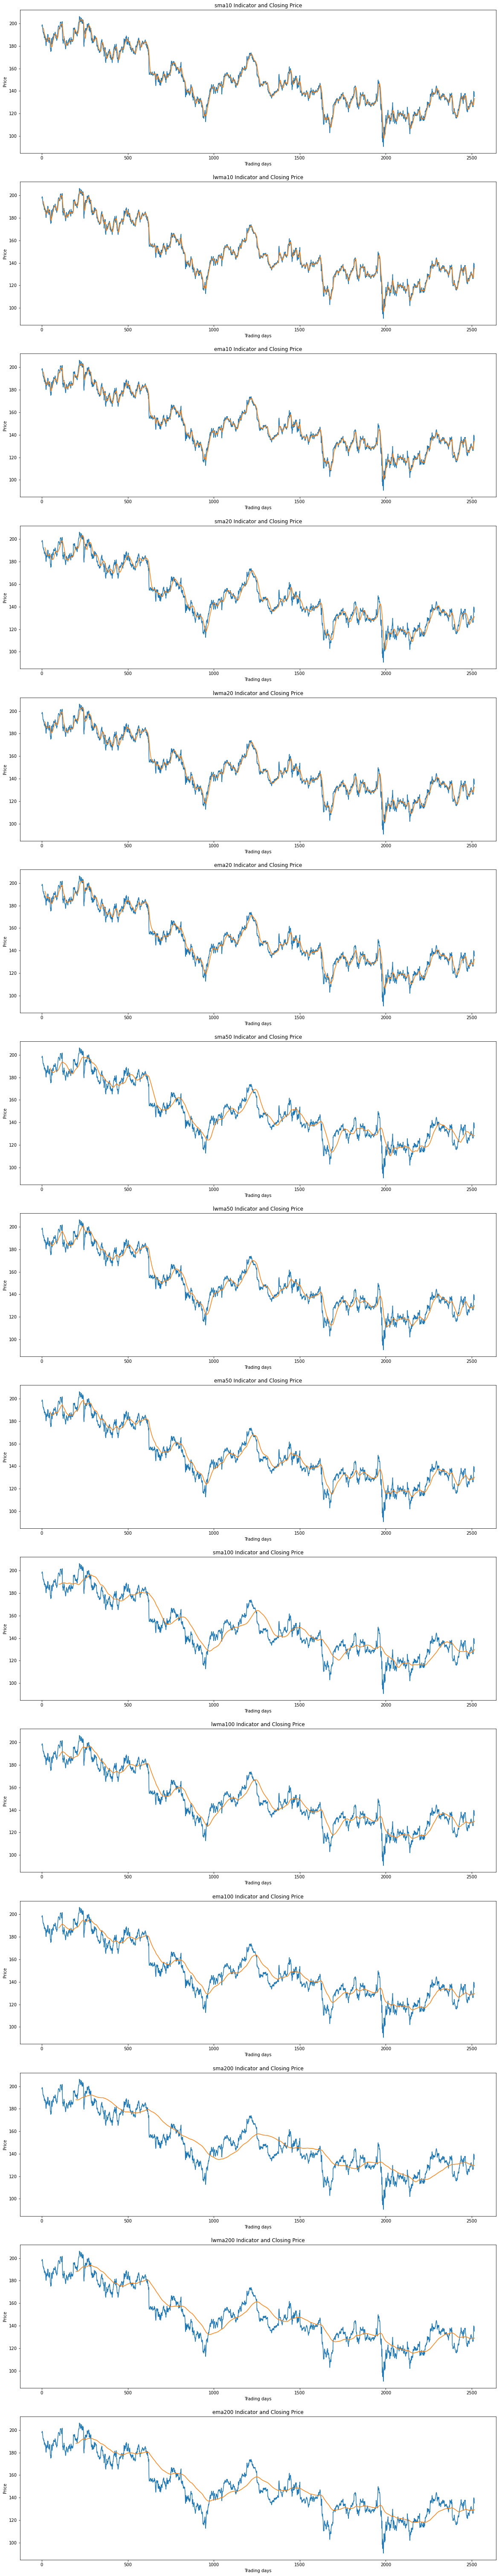

In [5]:
# Plot all the moving average indicators and the closing price
ma_columns = [column for column in ibm_data 
             if column.startswith("sma") 
             or column.startswith("lwma") 
             or column.startswith("ema")
            ]

fig, axs = plt.subplots(len(ma_columns), figsize=(20, 110))
plot_counter = 0

for indicator in ma_columns:
    current_subplot = axs[plot_counter]
    current_subplot.plot(time, ibm_data["current_price"])
    current_subplot.plot(time, ibm_data[indicator])
    current_subplot.title.set_text("{} Indicator and Closing Price".format(indicator))
    current_subplot.set_xlabel("Trading days")
    current_subplot.set_ylabel("Price")
    plot_counter += 1
    
plt.show()

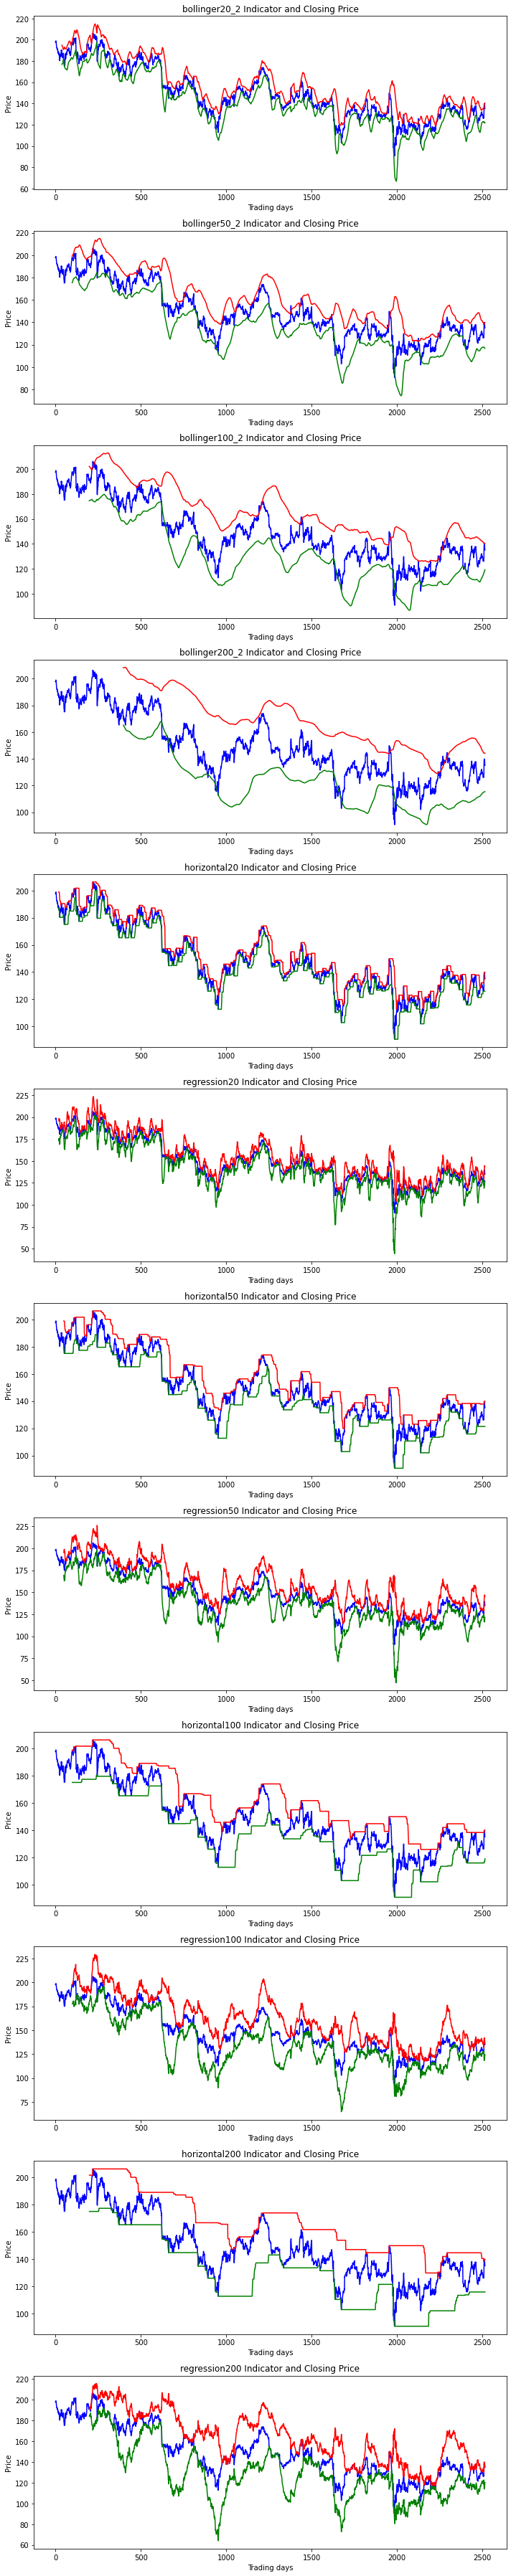

In [13]:
# Plot all the indicators with a channel and the closing price
ma_columns = [column.replace("lower", "{}") for column in ibm_data 
              if "lower" in column
             ]

fig, axs = plt.subplots(len(ma_columns), figsize=(10,50))
plot_counter = 0

for indicator in ma_columns:
    current_subplot = axs[plot_counter]
    current_subplot.plot(time, ibm_data["current_price"], color="blue")
    current_subplot.plot(time, ibm_data[indicator.format("lower")], color="green")
    current_subplot.plot(time, ibm_data[indicator.format("upper")], color="red")
    current_subplot.title.set_text("{} Indicator and Closing Price".format(indicator.replace("_{}", "")))
    current_subplot.set_xlabel("Trading days")
    current_subplot.set_ylabel("Price")
    plot_counter += 1

fig.tight_layout()
plt.show()

In [7]:
# plot crossings
# Plot all the indicators with a channel and the closing price
ma_columns = [column for column in ibm_data
              if "cross" in column 
              or "threshold" in column
             ]

fig, axs = plt.subplots(len(ma_columns), figsize=(20,100))
plot_counter = 0

for indicator in ma_columns:
    current_subplot = axs[plot_counter]
    current_subplot.plot(time, ibm_data["current_price"])
    for i, row in ibm_data.iterrows():
        if row[indicator] >= 1:
            current_subplot.axvline(x=i, color='orange', ls=':', label='indicator 1 signals')
        if row[indicator] <= -1:
            current_subplot.axvline(x=i, color='pink', ls=':', label='indicator -1 signals')
            
    current_subplot.title.set_text("{} Indicator and Closing Price".format(indicator.replace("_{}", "")))
    current_subplot.set_xlabel("Trading days")
    current_subplot.set_ylabel("Price")
    plot_counter += 1
    
plt.show()
